In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.__version__

'2.9.1'

In [3]:
keras.__version__


'2.9.0'

In [6]:
df = pd.read_csv('titanic.csv')

In [7]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Se imputarán los datos faltante, primero los asociadas a la variable Cabin, voy a asumir que los valores faltantes se deben a que la persona no tenían una cabina asignada, además, codificaré en una variable booleana los que tenían cabina (1) y los que no (0)

In [9]:
df["CabinB"] = (df["Cabin"].notnull().astype('int'))
del df["Cabin"]

In [10]:
df = df.fillna({"Embarked": "S"})

## Lo siguiente es estimar la edad de las personas, para esto simplemente voy a meter a las personas en determinados grupos( unkown, babies,etc.). Estas categorias me ayudarán a estimar una edad aproximada de las personas que no la tienen en el data set.


In [11]:
df["Age"] = df["Age"].fillna(-1)
bins = [-2, 0, 5, 12, 18, 21, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'post teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels=labels)

In [12]:
# Para estimar la edad de la clase unknown, me ayudaré de los titulos de las personas
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
pd.crosstab(df['title'], df['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
# reemplazar los titulos menos comunes
df['title_'] = df['title'].replace(['Capt', 'Col','Don', 'Dr', 'Major','Rev', 'Jonkheer'],'uncommon')

In [15]:
pd.crosstab(df['title_'], df['Sex'])


Sex,female,male
title_,,
Countess,1,0
Lady,1,0
Master,0,40
Miss,182,0
Mlle,2,0
Mme,1,0
Mr,0,517
Mrs,125,0
Ms,1,0


In [16]:
df['title_'] = df['title_'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['title_'] = df['title_'].replace('Mlle', 'Miss')
df['title_'] = df['title_'].replace('Ms', 'Miss')
df['title_'] = df['title_'].replace('Mme', 'Mrs')

In [17]:
pd.crosstab(df['title_'], df['Sex'])

Sex,female,male
title_,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Royal,2,1
uncommon,1,19


In [18]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinB,AgeGroup,title,title_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Young Adult,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Adult,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Young Adult,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Young Adult,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Young Adult,Mr,Mr
5,6,0,3,"Moran, Mr. James",male,-1.0,0,0,330877,8.4583,Q,0,Unknown,Mr,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,Adult,Mr,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,Baby,Master,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,Young Adult,Mrs,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,Teenager,Mrs,Mrs


In [19]:
# del la vista preliminar de arriba se puede ver que algunos titulos de mujeres no coinciden con su edad, entonces hay que arreglarlo
false_miss_index = df[(df['Sex'] == 'female') & (df['Age'] > 27) & (df['title_'] == 'Miss')]['title_'].index
df['title_'].iloc[false_miss_index] = df['title_'].iloc[false_miss_index].replace(['Miss'],'Mrs')

C:\Users\FRARIV\AppData\Local\Temp\ipykernel_40600\194312973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_'].iloc[false_miss_index] = df['title_'].iloc[false_miss_index].replace(['Miss'],'Mrs')


In [20]:
false_mrs_index = df[(df['Sex'] == 'female') & (df['Age'] <= 21) & (df['title_'] == 'Mrs')]['title_'].index
df['title_'].iloc[false_mrs_index] = df['title_'].iloc[false_mrs_index].replace(['Mrs'],'Miss')

C:\Users\FRARIV\AppData\Local\Temp\ipykernel_40600\174748092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_'].iloc[false_mrs_index] = df['title_'].iloc[false_mrs_index].replace(['Mrs'],'Miss')


In [21]:
#codificar los nuevos titulos
df['title_'] = df['title_'].map({"Mr": 1, "Miss": 2, "Mrs": 3,"Master": 4, "Royal": 5, "uncommon": 6})

In [22]:
#Ahora se usará la información de los titulos para estimar la categoria 'Unknown'.
age_title_mapping = {1: "Young Adult", 2: "post teen",3: "Adult", 4: "Child", 5: "Adult", 6: "Adult"}
 
for i in range(df.shape[0]):
    if df["AgeGroup"][i] == "Unknown":
        df["AgeGroup"][i] = age_title_mapping[df["title_"][i]]


In [23]:
df['AgeGroup'].unique()

['Young Adult', 'Adult', 'Baby', 'Teenager', 'post teen', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'post teen' < 'Young Adult' < 'Adult' < 'Senior']

In [24]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinB,AgeGroup,title,title_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Young Adult,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Adult,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Young Adult,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Young Adult,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Young Adult,Mr,1
5,6,0,3,"Moran, Mr. James",male,-1.0,0,0,330877,8.4583,Q,0,Young Adult,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,Adult,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,Baby,Master,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,Young Adult,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,Teenager,Mrs,2


In [25]:
# ahora se puede eliminar las siguientes variables
df = df.drop(['Age','title'], axis=1)

In [26]:
# Ahora se asignan valores numericos a las categorias de la edad
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'post teen': 4, 'Young Adult': 5, 'Adult': 6,
               'Senior': 7}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)
 
df.head()
 

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,CabinB,AgeGroup,title_
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,0,5.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,1,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,0,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,1,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,0,5.0,1


In [27]:
# eliminar la variable name y ticket pues no contienen más información relevante.
df = df.drop(['Name','Ticket'], axis=1)

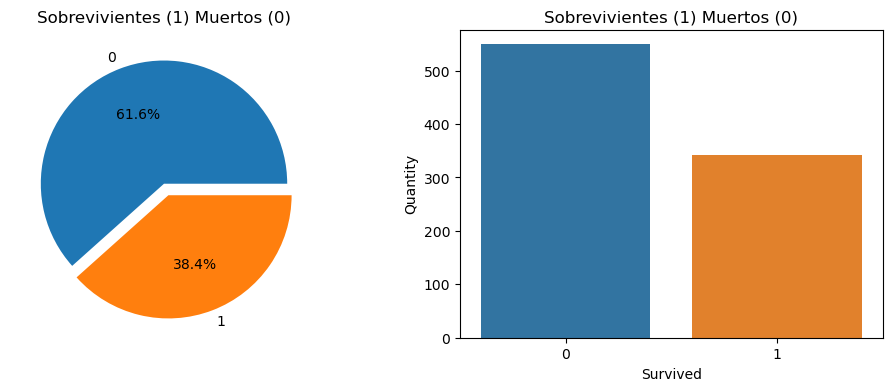

In [30]:
# vamos a ver la distribución de las clases de supervivientes 
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Sobrevivientes (1) Muertos (0)')
ax[0].set_ylabel('')
sns.countplot(x=df['Survived'], ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Sobrevivientes (1) Muertos (0)')
plt.show()

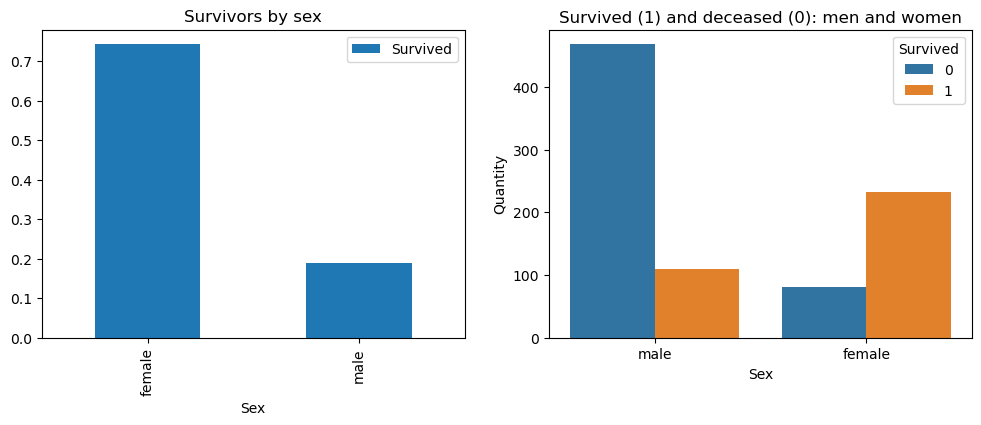

In [33]:
#ahora por sexo
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x ='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()

# vemos que se trata de un problema de calsificación donde su target está desbalanceado, para solventar esto se prodría implementar el método SMOTE. Pero no lo haré por ahora por falta de tiempo 

In [34]:
#Ahora se asignaran valores numéricos a las categorias sex y embarks
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)
 
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinB,AgeGroup,title_
0,1,0,3,0,1,0,7.2500,1,0,5.0,1
1,2,1,1,1,1,0,71.2833,2,1,6.0,3
2,3,1,3,1,0,0,7.9250,1,0,5.0,2
3,4,1,1,1,1,0,53.1000,1,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,0,5.0,1


In [35]:
# por último vamos a clasificar la variable Fare values en cuatro grupos
df['FareBand'] = pd.qcut(df['Fare'], 4,labels=[1, 2, 3, 4])

df = df.drop(['Fare'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinB,AgeGroup,title_,FareBand
0,1,0,3,0,1,0,1,0,5.0,1,1
1,2,1,1,1,1,0,2,1,6.0,3,4
2,3,1,3,1,0,0,1,0,5.0,2,2
3,4,1,1,1,1,0,1,1,5.0,3,4
4,5,0,3,0,0,0,1,0,5.0,1,2


In [36]:
#Ahora a implementar los modelos base
from sklearn.model_selection import train_test_split
 
predictors = df.drop(['Survived', 'PassengerId'], axis=1)
target = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
    predictors, target, test_size=0.2, random_state=0)

In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
 
randomforest = RandomForestClassifier()
 
# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
 
# Find the accuracy score of the model
acc_randomforest = round(precision_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

76.81


In [38]:
# regresión logística
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
 
# Find the accuracy score of the model
acc_logreg = round(precision_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

72.46


In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(x_train, y_train)

#Predict Output
y_pred= knn.predict(x_val) 
# Find the accuracy score of the model
acc_knn = round(precision_score(y_pred, y_val) * 100, 2)
print(acc_knn)

75.36


In [49]:
#Red neuronal
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

krs = Sequential()
krs.add(Dense(128,activation="selu",input_dim=x_train.shape[1], kernel_initializer="ones"))
krs.add(Dense(128,activation="selu"))
krs.add(Dense(256,activation="selu"))
krs.add(Dense(1, activation="sigmoid"))

krs.compile(loss="binary_crossentropy",metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01))
krs.fit(x_train.values, y_train.values, epochs=500, verbose=0)

In [50]:
#Predict Output
y_pred= krs.predict(x_val.values)

predicted_classes = np.where(y_pred >= 0.5, 1, 0)
# Find the accuracy score of the model
acc_keras = round(precision_score(predicted_classes, y_val) * 100, 2)
print(acc_keras)

6/6 [==============================] - 0s 2ms/step
89.86


In [51]:
models = pd.DataFrame({'Model':['Random Forest','KNN','Logistic Regression','Keras'],'precision':[acc_randomforest,acc_knn,acc_logreg,acc_keras]})
models

,Model,precision
0,Random Forest,76.81
1,KNN,75.36
2,Logistic Regression,72.46
3,Keras,89.86


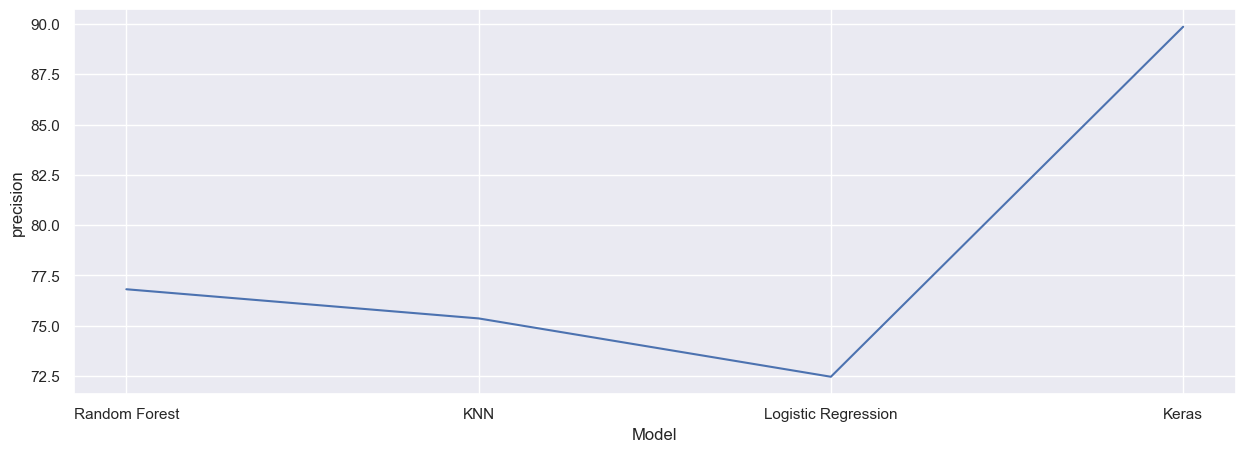

In [52]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x = "Model",
             y = "precision",
             data = models);

In [ ]:
# cosas por hacer:
# 1. Explorar espacio de hiperparametros de los modelos.
# 2. Validaciones cruzadas